In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix


In [8]:
def generate_xor_data(n_samples):
    """
    Function to generate XOR dataset.
    :param n_samples: Number of samples to generate
    :return: X (features), y (labels)
    """
    X = np.random.uniform(-1, 1, (n_samples, 2))
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
    return X, y


X_train, y_train = generate_xor_data(200)
X_test, y_test = generate_xor_data(200)

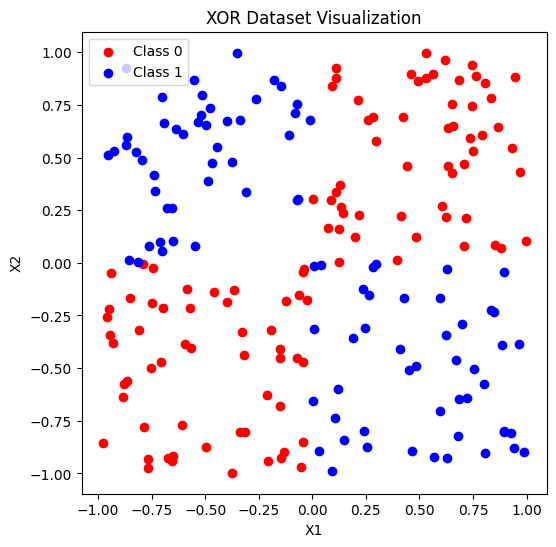

In [9]:
X_train, y_train = generate_xor_data(200)
X_test, y_test = generate_xor_data(200)

def plot_xor_data(X, y, title):
    """
    Function to visualize XOR dataset.
    :param X: Feature data
    :param y: Labels
    :param title: Title of the plot
    """
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label="Class 0")
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label="Class 1")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(title)
    plt.legend()
    plt.show()

plot_xor_data(X_train, y_train, "XOR Dataset Visualization")

In [10]:
def plot_decision_boundary(model, X, y, title, poly=None):
    """
    Function to plot decision boundaries.
    :param model: Trained model
    :param X: Feature data
    :param y: Labels
    :param title: Title of the plot
    :param poly: Polynomial features transformer, if applicable
    """
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    grid = np.c_[xx.ravel(), yy.ravel()]
    if poly:
        grid = poly.transform(grid)

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


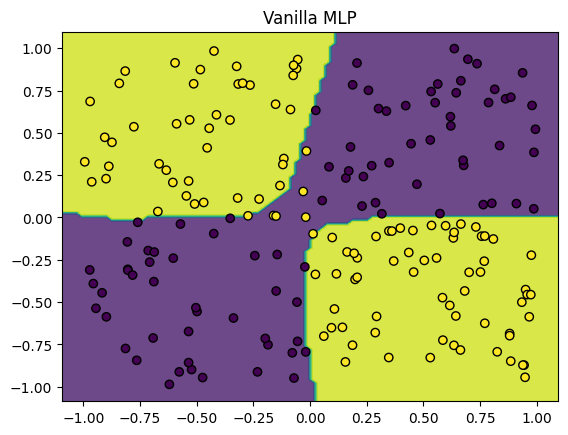

Accuracy Vanilla MLP: 0.96


In [11]:
# a) Vanilla MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=1000)
mlp.fit(X_train, y_train)

plot_decision_boundary(mlp, X_test, y_test, "Vanilla MLP")

print("Accuracy Vanilla MLP:", accuracy_score(y_test, mlp.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


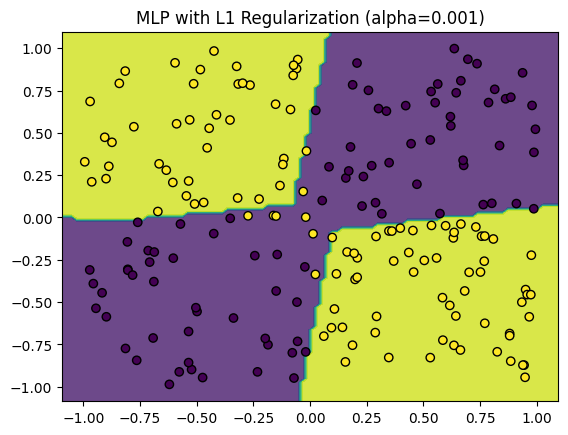

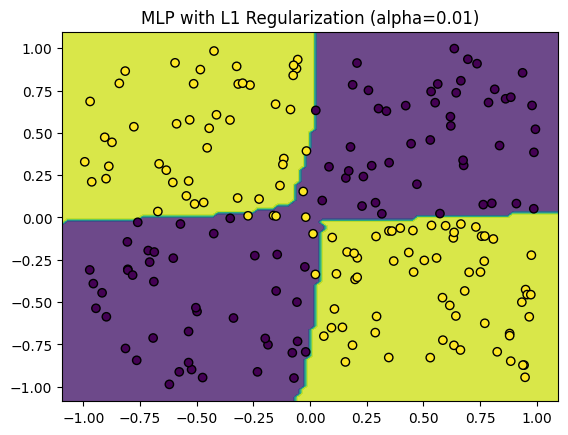

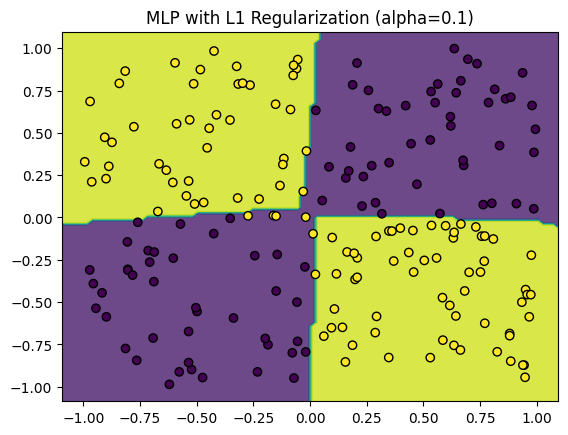

Accuracy MLP with L1 (alpha=0.001): 0.955
Accuracy MLP with L1 (alpha=0.01): 0.96
Accuracy MLP with L1 (alpha=0.1): 0.97


In [12]:
# b) MLP with L1 Regularization (using different alpha values)
l1_alphas = [0.001, 0.01, 0.1]  # Different values of alpha for experimentation
mlp_l1_models = [MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', alpha=alpha, max_iter=1000) for alpha in l1_alphas]
for model in mlp_l1_models:
    model.fit(X_train, y_train)

for i, alpha in enumerate(l1_alphas):
    plot_decision_boundary(mlp_l1_models[i], X_test, y_test, f"MLP with L1 Regularization (alpha={alpha})")

for i, alpha in enumerate(l1_alphas):
    print(f"Accuracy MLP with L1 (alpha={alpha}):", accuracy_score(y_test, mlp_l1_models[i].predict(X_test)))



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


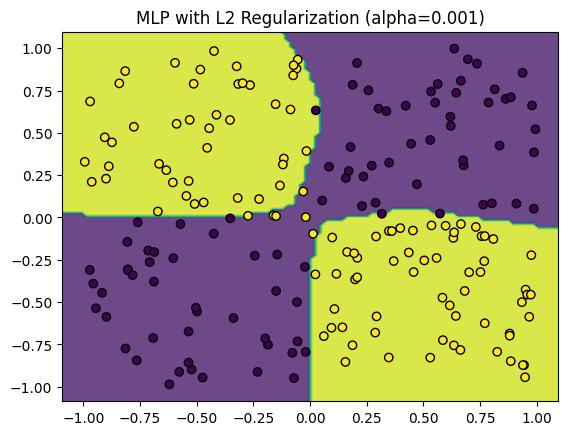

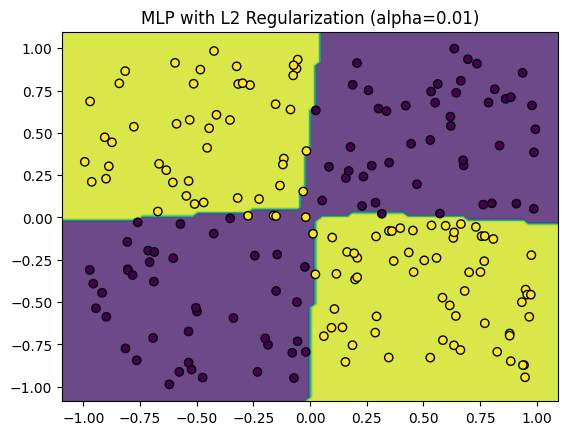

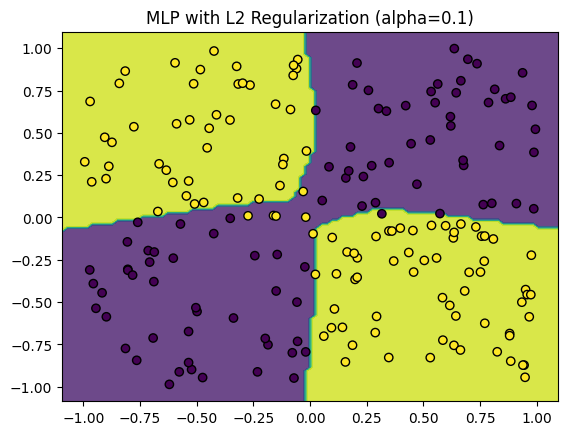

Accuracy MLP with L2 (alpha=0.001): 0.955
Accuracy MLP with L2 (alpha=0.01): 0.965
Accuracy MLP with L2 (alpha=0.1): 0.96


In [13]:
# c) MLP with L2 Regularization (using different alpha values)
l2_alphas = [0.001, 0.01, 0.1]  # Different values of alpha for experimentation
mlp_l2_models = [MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', alpha=alpha, max_iter=1000) for alpha in l2_alphas]
for model in mlp_l2_models:
    model.fit(X_train, y_train)

for i, alpha in enumerate(l2_alphas):
    plot_decision_boundary(mlp_l2_models[i], X_test, y_test, f"MLP with L2 Regularization (alpha={alpha})")

for i, alpha in enumerate(l2_alphas):
    print(f"Accuracy MLP with L2 (alpha={alpha}):", accuracy_score(y_test, mlp_l2_models[i].predict(X_test)))


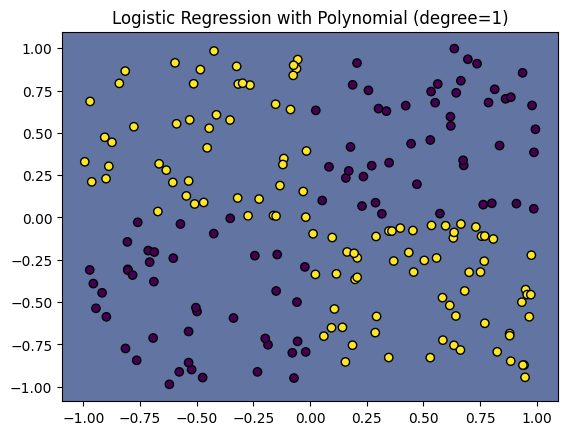

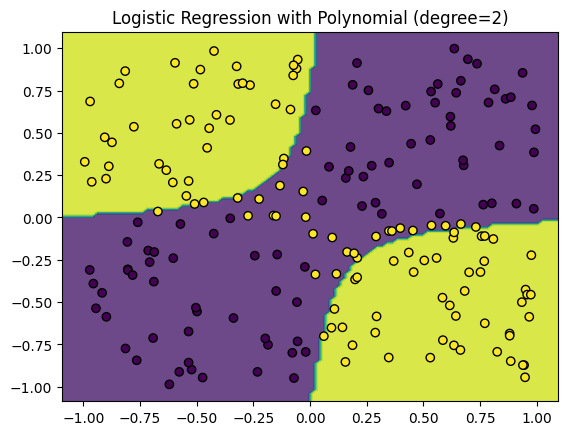

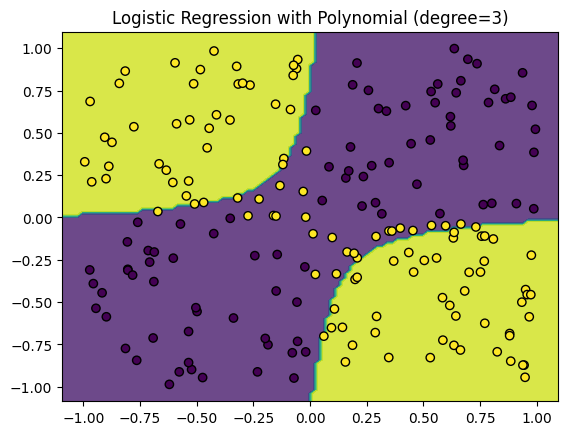

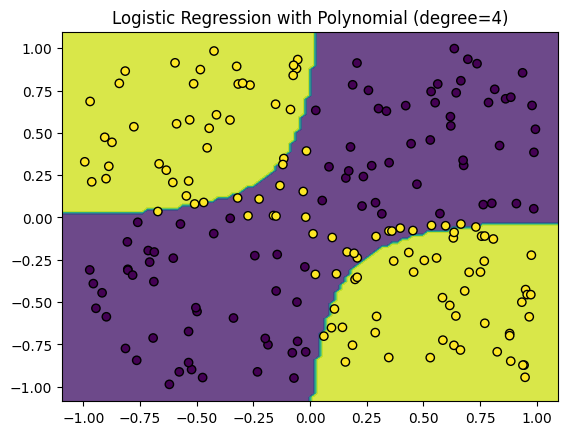

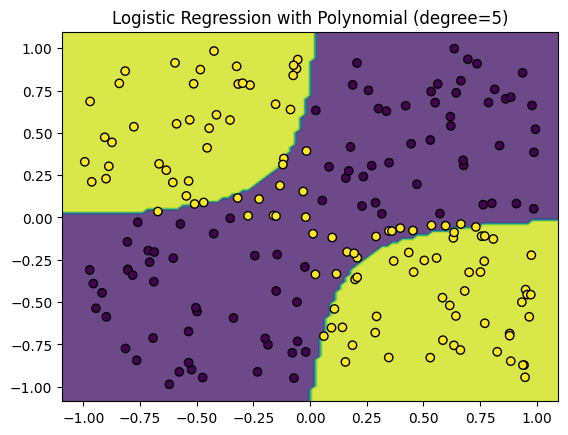

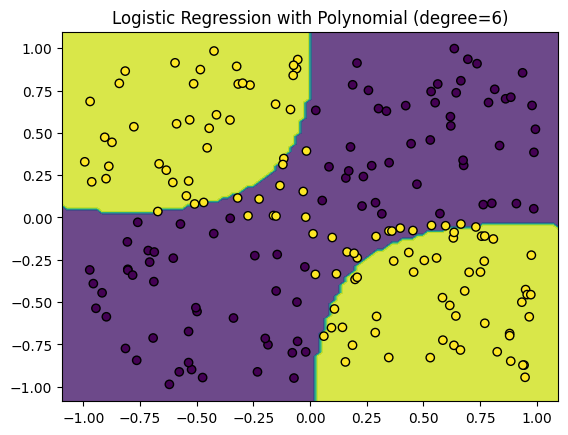

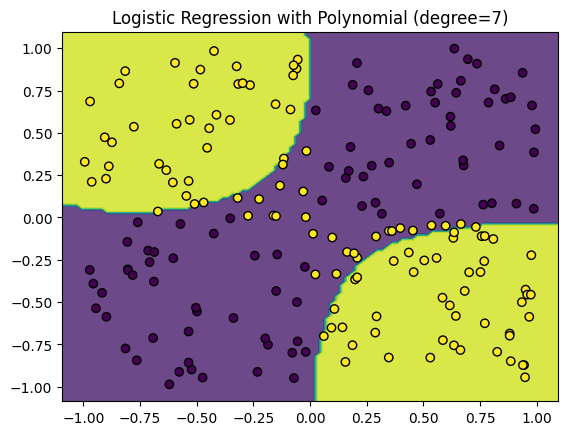

Accuracy Logistic Regression (degree=1): 0.445
Accuracy Logistic Regression (degree=2): 0.865
Accuracy Logistic Regression (degree=3): 0.87
Accuracy Logistic Regression (degree=4): 0.865
Accuracy Logistic Regression (degree=5): 0.87
Accuracy Logistic Regression (degree=6): 0.865
Accuracy Logistic Regression (degree=7): 0.865


In [17]:
poly_degrees = [1,2,3,4,5,6,7]
logreg_models = []
for degree in poly_degrees:
    poly = PolynomialFeatures(degree=degree, interaction_only=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train_poly, y_train)
    logreg_models.append((logreg, poly))

for i, (logreg, poly) in enumerate(logreg_models):
    plot_decision_boundary(logreg, X_test, y_test, f"Logistic Regression with Polynomial (degree={poly_degrees[i]})", poly=poly)

for i, (logreg, poly) in enumerate(logreg_models):

    X_test_poly = poly.transform(X_test)


    print(f"Accuracy Logistic Regression (degree={poly_degrees[i]}):", accuracy_score(y_test, logreg.predict(X_test_poly)))
